# La biblioteca pandas

[pandas](https://pandas.pydata.org/) es una biblioteca de Python para análisis y manipulación de datos. Proporciona estructuras de datos y operaciones para manejar tablas numéricas y series temporales. Fue creada por Wes McKinney in 2008. El nombre "pandas" hace referencia tanto a "*Panel Data*" como a "*Python Data Analysis*".

Como su estructura principal de datos, pandas implementa el [data frame](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html), el cual es un arreglo rectangular, organizado en filas y columnas.

## Instalación

pandas puede instalarse tanto mediante [Conda](https://conda.io/) como mediante [pip](https://pypi.org/project/pip/).

```shell
# Instalación mediante Conda
conda install pandas

# Instalación mediante pip
pip install pandas
```

## Carga
Antes de cargar pandas, debe cargarse antes la biblioteca [numpy](https://numpy.org/), para operaciones de álgebra lineal. Nótese el uso de los alias np y pd, los cuales no son obligatorios, pero sí recomendados.

In [1]:
import numpy as np # biblioteca para álgebra lineal
import pandas as pd # biblioteca para análisis de datos

## Estructuras de datos
Las dos principales estructuras de datos de pandas son series y dataframes.

### Series
Las series son arreglos unidimensionales que contienen datos de cualquier tipo. Se asemejan a una columna de una tabla.

In [2]:
primos = [2, 3, 5, 7, 11]

serie_primos = pd.Series(primos)

serie_primos

0     2
1     3
2     5
3     7
4    11
dtype: int64

Cada elemento de una serie tiene un índice (i.e. posición), comenzando con 0.

In [3]:
# Primer elemento
print(serie_primos[0])

# Segundo elemento
print(serie_primos[1])

2
3


Los índices también pueden tener etiquetas personalizadas:

In [4]:
serie_primos = pd.Series(primos, index = ["A", "B", "C", "D", "E"])

serie_primos

A     2
B     3
C     5
D     7
E    11
dtype: int64

In [5]:
# Elemento en el índice "D"
print(serie_primos["D"])

7


### Dataframes
Los dataframes son estructuras multidimensionales. Una serie puede verse como una columna de una tabla y un dataframe como una tabla completa. Un dataframe puede construirse a partir de varias series.

In [6]:
# Dataframe construído a partir de dos series
datos = {
  "pais": ["PA", "CR", "NI"],
  "poblacion": [4.1, 5.0, 6.6]
}

paises = pd.DataFrame(datos)

paises

,pais,poblacion
0,PA,4.1
1,CR,5.0
2,NI,6.6


El atributo **loc** permite retornar una o más filas de un dataframe:

In [7]:
# Segundo elemento
paises.loc[1]

pais          CR
poblacion    5.0
Name: 1, dtype: object

In [8]:
# Segundo y tercer elemento
paises.loc[[1, 2]]

,pais,poblacion
1,CR,5.0
2,NI,6.6


Los índices de los dataframes también pueden etiquetarse:

In [9]:
paises = pd.DataFrame(datos, index=["pais0", "pais1", "pais2"])
paises

,pais,poblacion
pais0,PA,4.1
pais1,CR,5.0
pais2,NI,6.6


In [10]:
# Elemento en "pais0"
paises.loc["pais0"]

pais          PA
poblacion    4.1
Name: pais0, dtype: object

## Operaciones básicas

Seguidamente, se describen y ejemplifican algunas de las funciones básicas de pandas.

En los siguientes ejemplos, se utilizará un conjunto de registros de presencia de felinos (familia *Felidae*) de Costa Rica, obtenido a través de una [consulta al portal de GBIF](https://www.gbif.org/occurrence/download/0016217-210914110416597).

### read_csv() - carga de datos

In [11]:
felidae = pd.read_csv("https://raw.githubusercontent.com/curso-python-imn/curso-python-imn.github.io/main/datos/gbif/felidae.csv", sep="\t")

### info() - información general sobre un conjunto de datos

In [12]:
felidae.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 50 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   gbifID                            150 non-null    int64  
 1   datasetKey                        150 non-null    object 
 2   occurrenceID                      147 non-null    object 
 3   kingdom                           150 non-null    object 
 4   phylum                            150 non-null    object 
 5   class                             150 non-null    object 
 6   order                             150 non-null    object 
 7   family                            150 non-null    object 
 8   genus                             150 non-null    object 
 9   species                           150 non-null    object 
 10  infraspecificEpithet              18 non-null     object 
 11  taxonRank                         150 non-null    object 
 12  scientif

### head(), tail(), sample() - despliegue de filas de un conjunto de datos

In [13]:
# Primeros 10 registros
felidae.head()

,gbifID,datasetKey,occurrenceID,kingdom,phylum,class,order,family,genus,species,...,identifiedBy,dateIdentified,license,rightsHolder,recordedBy,typeStatus,establishmentMeans,lastInterpreted,mediaType,issue
0,3337559907,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/90794984,Animalia,Chordata,Mammalia,Carnivora,Felidae,Puma,Puma concolor,...,Marvin López M.,2021-08-11T17:02:57,CC_BY_NC_4_0,Marvin López M.,Marvin López M.,NaN,NaN,2021-09-23T21:26:16.096Z,StillImage,COORDINATE_ROUNDED
1,3333401669,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/88270427,Animalia,Chordata,Mammalia,Carnivora,Felidae,Puma,Puma concolor,...,Tiziano Luka Pesci Rubilar,2021-07-23T17:52:04,CC_BY_NC_4_0,Rebeca Quirós,Rebeca Quirós,NaN,NaN,2021-09-23T21:15:51.507Z,NaN,COORDINATE_ROUNDED
2,3325502794,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/85490861,Animalia,Chordata,Mammalia,Carnivora,Felidae,Leopardus,Leopardus pardalis,...,Sofía Pastor Parajeles,2021-07-03T16:59:46,CC_BY_NC_4_0,Sofía Pastor Parajeles,Sofía Pastor Parajeles,NaN,NaN,2021-09-23T20:59:21.345Z,StillImage,COORDINATE_ROUNDED
3,3314547422,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/84224884,Animalia,Chordata,Mammalia,Carnivora,Felidae,Leopardus,Leopardus pardalis,...,Sofía Pastor Parajeles,2021-06-23T20:39:47,CC_BY_NC_4_0,Sofía Pastor Parajeles,Sofía Pastor Parajeles,NaN,NaN,2021-09-23T21:25:26.648Z,StillImage,NaN
4,3307298689,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/82810053,Animalia,Chordata,Mammalia,Carnivora,Felidae,Leopardus,Leopardus wiedii,...,David,2021-06-13T09:10:50,CC_BY_NC_4_0,David,David,NaN,NaN,2021-09-23T21:25:57.478Z,StillImage,COORDINATE_ROUNDED


In [14]:
# Últimos 15 registros
felidae.tail()

,gbifID,datasetKey,occurrenceID,kingdom,phylum,class,order,family,genus,species,...,identifiedBy,dateIdentified,license,rightsHolder,recordedBy,typeStatus,establishmentMeans,lastInterpreted,mediaType,issue
145,439779436,7e2989f0-f762-11e1-a439-00145eb45e9a,NaN,Animalia,Chordata,Mammalia,Carnivora,Felidae,Puma,Puma concolor,...,NaN,NaN,CC_BY_4_0,NaN,NaN,NaN,NaN,2021-09-24T03:32:37.674Z,StillImage,GEODETIC_DATUM_ASSUMED_WGS84;RECORDED_DATE_INV...
146,45869665,847e2306-f762-11e1-a439-00145eb45e9a,urn:catalog:LSUMZ:Mammals:13378,Animalia,Chordata,Mammalia,Carnivora,Felidae,Leopardus,Leopardus tigrinus,...,NaN,NaN,CC0_1_0,NaN,"Gardner, Alfred L.",NaN,NATIVE,2021-09-24T06:03:59.587Z,NaN,INSTITUTION_COLLECTION_MISMATCH
147,45869664,847e2306-f762-11e1-a439-00145eb45e9a,urn:catalog:LSUMZ:Mammals:13377,Animalia,Chordata,Mammalia,Carnivora,Felidae,Leopardus,Leopardus tigrinus,...,NaN,NaN,CC0_1_0,NaN,"Gardner, Alfred L.",NaN,NATIVE,2021-09-24T06:03:59.587Z,NaN,INSTITUTION_COLLECTION_MISMATCH
148,45869301,847e2306-f762-11e1-a439-00145eb45e9a,urn:catalog:LSUMZ:Mammals:10219,Animalia,Chordata,Mammalia,Carnivora,Felidae,Leopardus,Leopardus pardalis,...,NaN,NaN,CC0_1_0,NaN,"Arnold, Keith A.",NaN,NATIVE,2021-09-24T06:03:59.952Z,NaN,INSTITUTION_COLLECTION_MISMATCH
149,45869265,847e2306-f762-11e1-a439-00145eb45e9a,urn:catalog:LSUMZ:Mammals:9289,Animalia,Chordata,Mammalia,Carnivora,Felidae,Leopardus,Leopardus pardalis,...,NaN,NaN,CC0_1_0,NaN,NaN,NaN,NATIVE,2021-09-24T06:03:59.933Z,NaN,INSTITUTION_COLLECTION_MISMATCH


In [15]:
# 5 registros seleccionados aleatoriamente
felidae.sample(5)

,gbifID,datasetKey,occurrenceID,kingdom,phylum,class,order,family,genus,species,...,identifiedBy,dateIdentified,license,rightsHolder,recordedBy,typeStatus,establishmentMeans,lastInterpreted,mediaType,issue
58,2634486926,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/47519107,Animalia,Chordata,Mammalia,Carnivora,Felidae,Puma,Puma concolor,...,Hernani Fernandes,2020-05-27T15:42:49,CC_BY_NC_4_0,Hernani Fernandes,Hernani Fernandes,NaN,NaN,2021-09-23T21:22:32.377Z,StillImage,NaN
43,2840541344,8a863029-f435-446a-821e-275f4f641165,https://observation.org/observation/141587484,Animalia,Chordata,Mammalia,Carnivora,Felidae,Leopardus,Leopardus pardalis,...,NaN,NaN,CC_BY_NC_4_0,Stichting Natuurinformatie,NaN,NaN,NaN,2021-09-23T16:56:30.648Z,NaN,OCCURRENCE_STATUS_INFERRED_FROM_INDIVIDUAL_COUNT
53,2826388402,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/36886217,Animalia,Chordata,Mammalia,Carnivora,Felidae,Leopardus,Leopardus pardalis,...,Edward Bell,2019-12-23T16:57:35,CC_BY_4_0,Edward Bell,Edward Bell,NaN,NaN,2021-09-23T21:13:30.839Z,StillImage,COORDINATE_ROUNDED
100,2012983853,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/20914807,Animalia,Chordata,Mammalia,Carnivora,Felidae,Leopardus,Leopardus wiedii,...,Don Loarie,2019-03-03T17:33:02,CC_BY_4_0,Don Loarie,Don Loarie,NaN,NaN,2021-09-23T21:10:26.867Z,StillImage,COORDINATE_ROUNDED
109,1913716101,50c9509d-22c7-4a22-a47d-8c48425ef4a7,http://www.inaturalist.org/observations/2670324,Animalia,Chordata,Mammalia,Carnivora,Felidae,Puma,Puma concolor,...,Andy Jones,2016-02-11T19:57:25,CC_BY_NC_4_0,Andy Jones,Andy Jones,NaN,NaN,2021-09-23T20:55:47.190Z,StillImage,NaN


Los contenidos de un data frame también pueden desplegarse al escribir su nombre en la consola de Python.

In [16]:
felidae

,gbifID,datasetKey,occurrenceID,kingdom,phylum,class,order,family,genus,species,...,identifiedBy,dateIdentified,license,rightsHolder,recordedBy,typeStatus,establishmentMeans,lastInterpreted,mediaType,issue
0,3337559907,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/90794984,Animalia,Chordata,Mammalia,Carnivora,Felidae,Puma,Puma concolor,...,Marvin López M.,2021-08-11T17:02:57,CC_BY_NC_4_0,Marvin López M.,Marvin López M.,NaN,NaN,2021-09-23T21:26:16.096Z,StillImage,COORDINATE_ROUNDED
1,3333401669,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/88270427,Animalia,Chordata,Mammalia,Carnivora,Felidae,Puma,Puma concolor,...,Tiziano Luka Pesci Rubilar,2021-07-23T17:52:04,CC_BY_NC_4_0,Rebeca Quirós,Rebeca Quirós,NaN,NaN,2021-09-23T21:15:51.507Z,NaN,COORDINATE_ROUNDED
2,3325502794,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/85490861,Animalia,Chordata,Mammalia,Carnivora,Felidae,Leopardus,Leopardus pardalis,...,Sofía Pastor Parajeles,2021-07-03T16:59:46,CC_BY_NC_4_0,Sofía Pastor Parajeles,Sofía Pastor Parajeles,NaN,NaN,2021-09-23T20:59:21.345Z,StillImage,COORDINATE_ROUNDED
3,3314547422,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/84224884,Animalia,Chordata,Mammalia,Carnivora,Felidae,Leopardus,Leopardus pardalis,...,Sofía Pastor Parajeles,2021-06-23T20:39:47,CC_BY_NC_4_0,Sofía Pastor Parajeles,Sofía Pastor Parajeles,NaN,NaN,2021-09-23T21:25:26.648Z,StillImage,NaN
4,3307298689,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/82810053,Animalia,Chordata,Mammalia,Carnivora,Felidae,Leopardus,Leopardus wiedii,...,David,2021-06-13T09:10:50,CC_BY_NC_4_0,David,David,NaN,NaN,2021-09-23T21:25:57.478Z,StillImage,COORDINATE_ROUNDED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,439779436,7e2989f0-f762-11e1-a439-00145eb45e9a,NaN,Animalia,Chordata,Mammalia,Carnivora,Felidae,Puma,Puma concolor,...,NaN,NaN,CC_BY_4_0,NaN,NaN,NaN,NaN,2021-09-24T03:32:37.674Z,StillImage,GEODETIC_DATUM_ASSUMED_WGS84;RECORDED_DATE_INV...
146,45869665,847e2306-f762-11e1-a439-00145eb45e9a,urn:catalog:LSUMZ:Mammals:13378,Animalia,Chordata,Mammalia,Carnivora,Felidae,Leopardus,Leopardus tigrinus,...,NaN,NaN,CC0_1_0,NaN,"Gardner, Alfred L.",NaN,NATIVE,2021-09-24T06:03:59.587Z,NaN,INSTITUTION_COLLECTION_MISMATCH
147,45869664,847e2306-f762-11e1-a439-00145eb45e9a,urn:catalog:LSUMZ:Mammals:13377,Animalia,Chordata,Mammalia,Carnivora,Felidae,Leopardus,Leopardus tigrinus,...,NaN,NaN,CC0_1_0,NaN,"Gardner, Alfred L.",NaN,NATIVE,2021-09-24T06:03:59.587Z,NaN,INSTITUTION_COLLECTION_MISMATCH
148,45869301,847e2306-f762-11e1-a439-00145eb45e9a,urn:catalog:LSUMZ:Mammals:10219,Animalia,Chordata,Mammalia,Carnivora,Felidae,Leopardus,Leopardus pardalis,...,NaN,NaN,CC0_1_0,NaN,"Arnold, Keith A.",NaN,NATIVE,2021-09-24T06:03:59.952Z,NaN,INSTITUTION_COLLECTION_MISMATCH


### Selección de columnas

Las columnas que se despliegan en un data frame pueden especificarse mediante una lista.

In [17]:
# Despliegue de las columnas con el nombre científico, la especie, la fecha, el año, el mes y el día
felidae[["scientificName", "species", "eventDate", "year", "month", "day"]]

,scientificName,species,eventDate,year,month,day
0,"Puma concolor (Linnaeus, 1771)",Puma concolor,2021-08-11T10:22:36,2021.0,8.0,11.0
1,"Puma concolor (Linnaeus, 1771)",Puma concolor,2021-07-15T16:22:29,2021.0,7.0,15.0
2,"Leopardus pardalis (Linnaeus, 1758)",Leopardus pardalis,2021-07-01T19:28:25,2021.0,7.0,1.0
3,"Leopardus pardalis (Linnaeus, 1758)",Leopardus pardalis,2021-06-23T10:55:00,2021.0,6.0,23.0
4,"Leopardus wiedii (Schinz, 1821)",Leopardus wiedii,2015-12-05T14:41:42,2015.0,12.0,5.0
...,...,...,...,...,...,...
145,"Puma concolor (Linnaeus, 1771)",Puma concolor,NaN,NaN,NaN,NaN
146,"Leopardus tigrinus (Schreber, 1775)",Leopardus tigrinus,1967-05-15T00:00:00,1967.0,5.0,15.0
147,"Leopardus tigrinus (Schreber, 1775)",Leopardus tigrinus,1967-02-01T00:00:00,1967.0,2.0,1.0
148,"Leopardus pardalis (Linnaeus, 1758)",Leopardus pardalis,1965-06-28T00:00:00,1965.0,6.0,28.0


### Selección de filas

In [18]:
# Selección de filas correspondientes a jaguares (*Panthera onca*)
panthera_onca = felidae[felidae["species"] == "Panthera onca"]

# Despliegue de los primeros registros
panthera_onca.head()

,gbifID,datasetKey,occurrenceID,kingdom,phylum,class,order,family,genus,species,...,identifiedBy,dateIdentified,license,rightsHolder,recordedBy,typeStatus,establishmentMeans,lastInterpreted,mediaType,issue
21,3008449314,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/15270189,Animalia,Chordata,Mammalia,Carnivora,Felidae,Panthera,Panthera onca,...,mike_cove,2018-08-09T20:10:35,CC0_1_0,mike_cove,mike_cove,NaN,NaN,2021-09-23T20:57:45.632Z,NaN,COORDINATE_ROUNDED
32,2860189171,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/58257138,Animalia,Chordata,Mammalia,Carnivora,Felidae,Panthera,Panthera onca,...,Kate Rothra Fleming,2020-09-01T16:56:35,CC_BY_NC_4_0,Kate Rothra Fleming,Kate Rothra Fleming,NaN,NaN,2021-09-23T21:14:12.219Z,StillImage,COORDINATE_ROUNDED
38,2850700339,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/55493722,Animalia,Chordata,Mammalia,Carnivora,Felidae,Panthera,Panthera onca,...,Osa Conservation,2020-08-05T14:47:40,CC_BY_NC_4_0,Osa Conservation,Osa Conservation,NaN,NaN,2021-09-23T21:08:25.102Z,StillImage,COORDINATE_ROUNDED
57,2802770349,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/15255648,Animalia,Chordata,Mammalia,Carnivora,Felidae,Panthera,Panthera onca,...,James Telford,2018-08-09T07:22:08,CC_BY_4_0,James Telford,James Telford,NaN,NaN,2021-09-23T20:58:14.603Z,NaN,COORDINATE_ROUNDED
61,2629043484,09d2da7b-4699-4e45-b0da-73c982660c98,urn:catalog:KU:KUM:145971:08353198cc55c65471bf...,Animalia,Chordata,Mammalia,Carnivora,Felidae,Panthera,Panthera onca,...,Consuelo Lorenzo & Jorge Bolaños,NaN,CC_BY_4_0,Comisión Nacional para el Conocimiento y Uso d...,NO DISPONIBLE,NaN,NaN,2021-09-23T18:42:40.301Z,NaN,TYPE_STATUS_INVALID;OCCURRENCE_STATUS_INFERRED...


In [19]:
# Selección de filas correspondientes a jaguares (*Panthera onca*) o pumas (*Puma concolor*)
panthera_onca_puma_concolor = felidae[(felidae["species"] == "Panthera onca") | (felidae["species"] == "Puma concolor")]

# Despliegue de los primeros registros
panthera_onca_puma_concolor.head(10)

,gbifID,datasetKey,occurrenceID,kingdom,phylum,class,order,family,genus,species,...,identifiedBy,dateIdentified,license,rightsHolder,recordedBy,typeStatus,establishmentMeans,lastInterpreted,mediaType,issue
0,3337559907,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/90794984,Animalia,Chordata,Mammalia,Carnivora,Felidae,Puma,Puma concolor,...,Marvin López M.,2021-08-11T17:02:57,CC_BY_NC_4_0,Marvin López M.,Marvin López M.,NaN,NaN,2021-09-23T21:26:16.096Z,StillImage,COORDINATE_ROUNDED
1,3333401669,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/88270427,Animalia,Chordata,Mammalia,Carnivora,Felidae,Puma,Puma concolor,...,Tiziano Luka Pesci Rubilar,2021-07-23T17:52:04,CC_BY_NC_4_0,Rebeca Quirós,Rebeca Quirós,NaN,NaN,2021-09-23T21:15:51.507Z,NaN,COORDINATE_ROUNDED
6,3302057398,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/81502744,Animalia,Chordata,Mammalia,Carnivora,Felidae,Puma,Puma concolor,...,Michelle Monge-Velazquez,2021-06-04T00:10:47,CC_BY_NC_4_0,Michelle Monge-Velazquez,Michelle Monge-Velazquez,NaN,NaN,2021-09-23T21:15:55.933Z,StillImage,COORDINATE_ROUNDED
10,3097275563,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/73407648,Animalia,Chordata,Mammalia,Carnivora,Felidae,Puma,Puma concolor,...,Jaime Marcelo Aranda Sánchez,2021-04-09T22:42:23,CC_BY_NC_4_0,nubegris,nubegris,NaN,NaN,2021-09-23T21:15:03.814Z,StillImage,COORDINATE_ROUNDED
11,3079910798,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/73053113,Animalia,Chordata,Mammalia,Carnivora,Felidae,Puma,Puma concolor,...,gernotkunz,2021-04-05T21:48:18,CC_BY_NC_4_0,gernotkunz,gernotkunz,NaN,NaN,2021-09-23T21:24:37.211Z,NaN,COORDINATE_ROUNDED
12,3079872785,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/73053107,Animalia,Chordata,Mammalia,Carnivora,Felidae,Puma,Puma concolor,...,gernotkunz,2021-04-05T21:48:17,CC_BY_NC_4_0,gernotkunz,gernotkunz,NaN,NaN,2021-09-23T21:23:35.478Z,NaN,COORDINATE_ROUNDED
13,3067612232,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/66718421,Animalia,Chordata,Mammalia,Carnivora,Felidae,Puma,Puma concolor,...,Jeff Mollenhauer,2020-12-18T01:09:50,CC_BY_NC_4_0,Jeff Mollenhauer,Jeff Mollenhauer,NaN,NaN,2021-09-23T21:09:44.468Z,StillImage,COORDINATE_ROUNDED
17,3031700803,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/68067200,Animalia,Chordata,Mammalia,Carnivora,Felidae,Puma,Puma concolor,...,Marian Paniagua,2021-01-14T20:04:58,CC_BY_NC_4_0,Marian Paniagua,Marian Paniagua,NaN,NaN,2021-09-23T21:14:47.597Z,StillImage,COORDINATE_ROUNDED
20,3008566753,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/66811638,Animalia,Chordata,Mammalia,Carnivora,Felidae,Puma,Puma concolor,...,jayras,2020-12-20T05:44:17,CC_BY_NC_4_0,Pacho Gutierrez,Pacho Gutierrez,NaN,NaN,2021-09-23T21:14:42.430Z,StillImage,COORDINATE_ROUNDED
21,3008449314,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/15270189,Animalia,Chordata,Mammalia,Carnivora,Felidae,Panthera,Panthera onca,...,mike_cove,2018-08-09T20:10:35,CC0_1_0,mike_cove,mike_cove,NaN,NaN,2021-09-23T20:57:45.632Z,NaN,COORDINATE_ROUNDED


## Operaciones de análisis

### Graficación

#### Carga de bibliotecas

In [20]:
import matplotlib.pyplot as plt # biblioteca de graficación
%matplotlib inline

import calendar # biblioteca para manejo de fechas

#### Estilo de los gráficos

In [21]:
# Estilo de los gráficos
plt.style.use('ggplot')

#### Ejemplos de gráficos

##### Distribución de registros de presencia por año

In [22]:
# Cambio del tipo de datos del campo de fecha
felidae["eventDate"] = pd.to_datetime(felidae["eventDate"])

# Agrupación de los registros por año
felidae_registros_x_anio = felidae.groupby(felidae['eventDate'].dt.year).count().eventDate

felidae_registros_x_anio

eventDate
1839.0     6
1928.0     2
1931.0     1
1932.0     2
1933.0     1
1939.0     1
1954.0     2
1958.0     1
1963.0     2
1964.0     1
1965.0     2
1967.0     2
1970.0     1
1993.0     2
2002.0     1
2005.0     1
2007.0     1
2008.0     1
2009.0     6
2010.0     3
2011.0     2
2012.0     6
2013.0     6
2014.0     3
2015.0    10
2016.0     8
2017.0    15
2018.0     4
2019.0    20
2020.0    23
2021.0    12
Name: eventDate, dtype: int64

In [23]:
# Conversión a un dataframe
felidae_registros_x_anio_df = pd.DataFrame({'anio':felidae_registros_x_anio.index, 'registros':felidae_registros_x_anio.values}) 

# Conversión del tipo de la columna de año
felidae_registros_x_anio_df["anio"] = pd.to_numeric(felidae_registros_x_anio_df["anio"], downcast='integer')
felidae_registros_x_anio_df.style.set_precision(2)

felidae_registros_x_anio_df

/tmp/ipykernel_87495/1460916896.py:6: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  felidae_registros_x_anio_df.style.set_precision(2)


,anio,registros
0,1839,6
1,1928,2
2,1931,1
3,1932,2
4,1933,1
5,1939,1
6,1954,2
7,1958,1
8,1963,2
9,1964,1


Text(0, 0.5, 'Cantidad de registros')

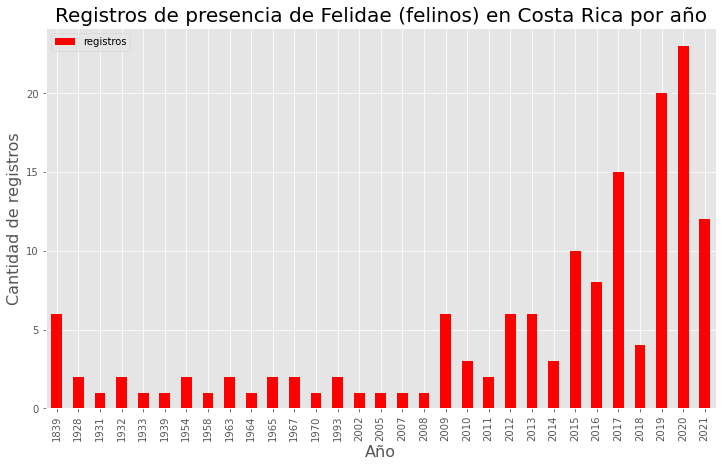

In [24]:
# Graficación
felidae_registros_x_anio_df.plot(x='anio', y='registros', kind='bar', figsize=(12,7), color='red')

# Título y leyendas en los ejes
plt.title('Registros de presencia de Felidae (felinos) en Costa Rica por año', fontsize=20)
plt.xlabel('Año', fontsize=16)
plt.ylabel('Cantidad de registros', fontsize=16)

##### Distribución de registros de presencia por mes

In [25]:
# Agrupación de los registros por mes
felidae_registros_x_mes = felidae.groupby(felidae['eventDate'].dt.month).count().eventDate

felidae_registros_x_mes

eventDate
1.0     28
2.0     15
3.0     21
4.0      8
5.0      9
6.0     15
7.0     13
8.0      9
9.0      5
10.0     8
11.0     2
12.0    15
Name: eventDate, dtype: int64

In [26]:
# Reemplazo del número del mes por el nombre del mes
felidae_registros_x_mes.index=[calendar.month_name[x] for x in range(1,13)]

felidae_registros_x_mes

January      28
February     15
March        21
April         8
May           9
June         15
July         13
August        9
September     5
October       8
November      2
December     15
Name: eventDate, dtype: int64

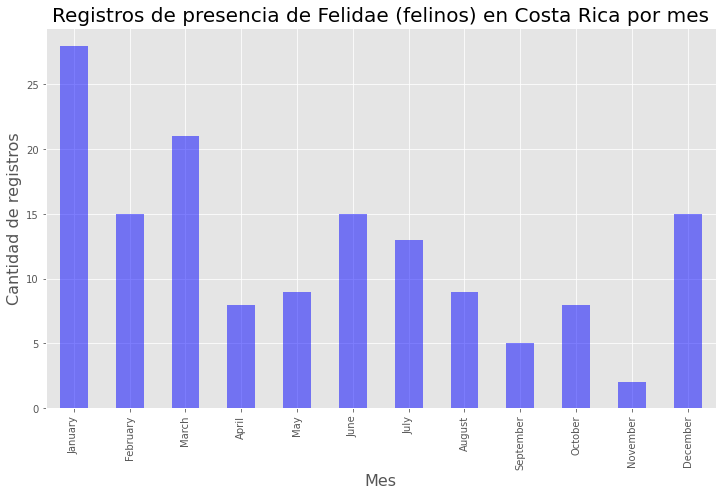

In [27]:
# Gráfico de barras
felidae_registros_x_mes.plot(kind='bar',figsize=(12,7), color='blue', alpha=0.5)

# Título y leyendas en los ejes
plt.title('Registros de presencia de Felidae (felinos) en Costa Rica por mes', fontsize=20)
plt.xlabel('Mes', fontsize=16)
plt.ylabel('Cantidad de registros', fontsize=16);

##### Graficación en una línea de tiempo

In [28]:
# Agrupación de los registros por fecha
registros_x_fecha = felidae.groupby(felidae['eventDate'].dt.date).count().eventDate

registros_x_fecha

eventDate
1839-01-01    6
1928-01-01    2
1931-05-29    1
1932-01-01    1
1932-06-01    1
             ..
2021-06-03    1
2021-06-23    1
2021-07-01    1
2021-07-15    1
2021-08-11    1
Name: eventDate, Length: 135, dtype: int64

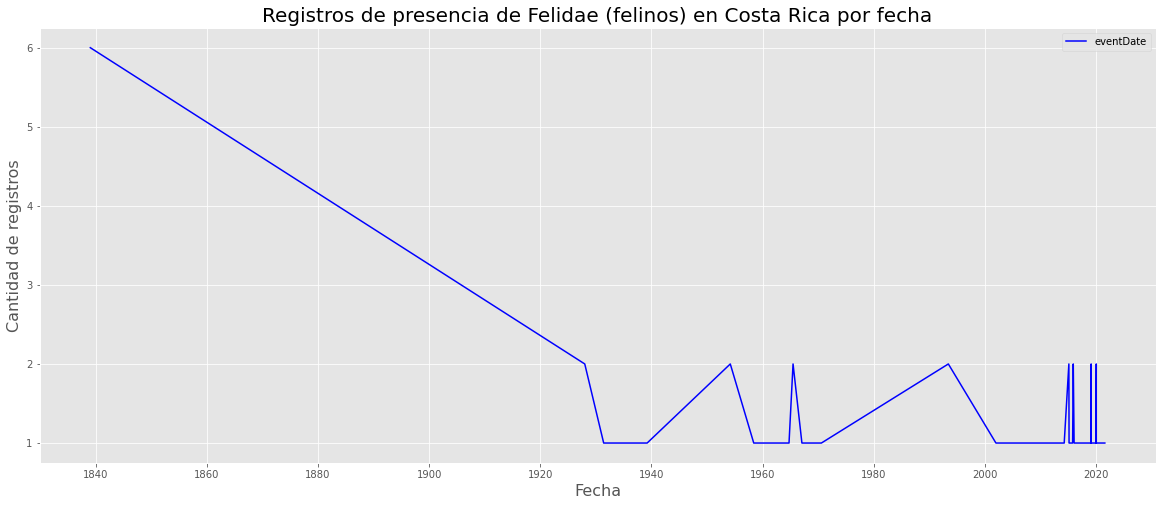

In [29]:
# Gráfico de líneas
registros_x_fecha.plot(figsize=(20,8), color='blue')

# Título y leyendas en los ejes
plt.title('Registros de presencia de Felidae (felinos) en Costa Rica por fecha', fontsize=20)
plt.xlabel('Fecha',fontsize=16)
plt.ylabel('Cantidad de registros',fontsize=16);
plt.legend()

## Datos del IMN

In [30]:
san_carlos = pd.read_csv("https://raw.githubusercontent.com/curso-python-imn/curso-python-imn.github.io/main/datos/analisis-riesgo/indicadores-vulnerabilidad-SAN%20CARLOS.csv")

san_carlos

,DISTRITO,COD_DIST,UGM,HOMBRES,MUJERES,TOTAL,SIN_CARENCIAS,CARENCIAS_1,CARENCIAS_2,CARENCIAS_3,...,MEDIOS_DE_VIDA,NORMALIZACION_BASE_100_MEDIOS_DE_VIDA,LONGITUD_CAMINOS_PCT,NORMALIZACION_BASE_100_10_CAMINOS,AREA_ASP_PCT,NORMALIZACION_BASE_100_10_ASP,AREA_SOBREUSO_PCT,NORMALIZACION_BASE_100_10_SOBREUSO,SUMA_VULNERABILIDADES,INDICE_VULNERABILIDAD_INTEGRADO
0,Quesada,21001,85,99,107,206,131,70,5,0,...,103.8119,31.619130,6.559543,7.151004,12.065766,6.893093,26.316350,5.212499,177.891153,51.771562
1,Quesada,21001,227,28,32,60,46,14,0,0,...,122.1502,46.094674,6.559543,7.151004,12.065766,6.893093,26.316350,5.212499,79.492977,19.964000
2,Quesada,21001,233,16,16,32,31,0,0,0,...,142.8400,62.426402,6.559543,7.151004,12.065766,6.893093,26.316350,5.212499,87.565350,22.573424
3,Quesada,21001,239,30,38,68,64,4,0,0,...,105.8029,33.190748,6.559543,7.151004,12.065766,6.893093,26.316350,5.212499,71.745061,17.459459
4,Quesada,21001,397,64,67,131,102,21,8,0,...,96.7634,26.055317,6.559543,7.151004,12.065766,6.893093,26.316350,5.212499,92.081966,24.033436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1582,Pocosol,21013,71751,72,82,154,112,30,12,0,...,108.2923,35.155784,20.474462,0.000000,7.385222,8.098322,9.102449,1.654850,114.612662,31.316564
1583,Pocosol,21013,71752,64,46,110,20,26,34,30,...,163.4000,78.655670,20.474462,0.000000,7.385222,8.098322,9.102449,1.654850,146.893208,41.751366
1584,Pocosol,21013,71753,76,59,135,28,19,42,37,...,151.3537,69.146787,20.474462,0.000000,7.385222,8.098322,9.102449,1.654850,137.989771,38.873298
1585,Pocosol,21013,71754,68,79,147,106,40,0,0,...,114.2685,39.873165,20.474462,0.000000,7.385222,8.098322,9.102449,1.654850,82.422717,20.911049


In [31]:
# Estructura
san_carlos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1587 entries, 0 to 1586
Data columns (total 46 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   DISTRITO                               1587 non-null   object 
 1   COD_DIST                               1587 non-null   int64  
 2   UGM                                    1587 non-null   int64  
 3   HOMBRES                                1587 non-null   int64  
 4   MUJERES                                1587 non-null   int64  
 5   TOTAL                                  1587 non-null   int64  
 6   SIN_CARENCIAS                          1587 non-null   int64  
 7   CARENCIAS_1                            1587 non-null   int64  
 8   CARENCIAS_2                            1587 non-null   int64  
 9   CARENCIAS_3                            1587 non-null   int64  
 10  CARENCIAS_4                            1587 non-null   int64  
 11  NULO

### Gráficos

<AxesSubplot:>

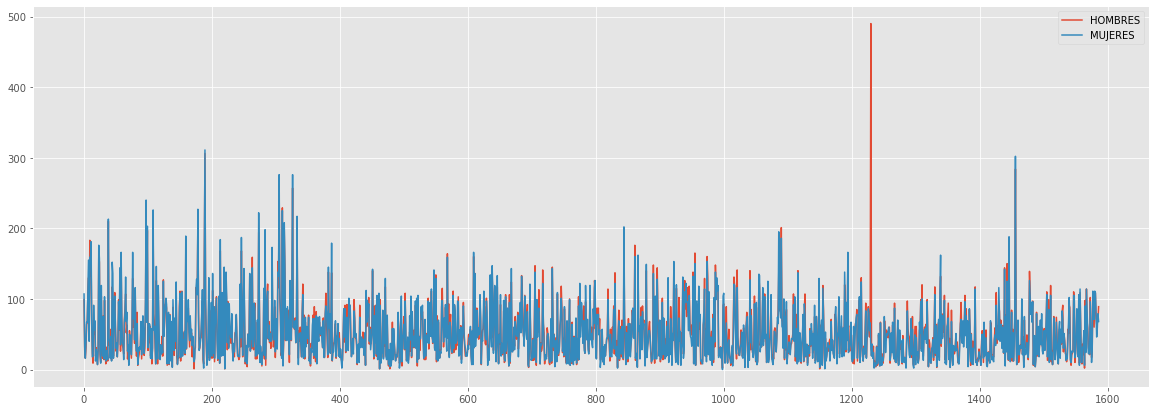

In [32]:
# Gráfico de un subconjunto
san_carlos_s01 = san_carlos[["HOMBRES", "MUJERES"]]

san_carlos_s01.plot(figsize=(20,7))

### Histogramas
Muestran la distribución de una variable numérica.

<AxesSubplot:ylabel='Frequency'>

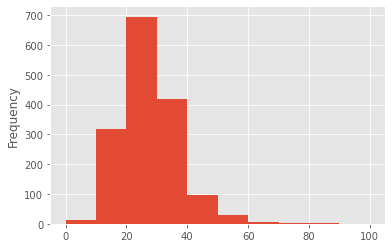

In [33]:
# Histograma de la variable INDICE_VULNERABILIDAD_INTEGRADO
san_carlos["INDICE_VULNERABILIDAD_INTEGRADO"].plot(kind = 'hist')

### Gráficos de dispersión (*scatterplots*)
Muestran la relación entre dos variables numéricas.

<AxesSubplot:xlabel='HOMBRES', ylabel='INDICE_VULNERABILIDAD_INTEGRADO'>

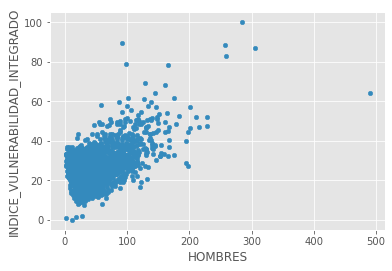

In [34]:
# Gráfico de dispersión HOMBRES e INDICE_VULNERABILIDAD_INTEGRADO
san_carlos.plot(kind = 'scatter', x = 'HOMBRES', y = 'INDICE_VULNERABILIDAD_INTEGRADO')

### Análisis de correlación

In [36]:
# Correlaciones de un subconjunto de datos
san_carlos_s01.corr()

,HOMBRES,MUJERES
HOMBRES,1.000000,0.932497
MUJERES,0.932497,1.000000


In [ ]:
# Correlaciones de todo el conjunto de datos
san_carlos.corr()